In [27]:
#import ipyrad.analysis as ipa   ## ipyrad analysis toolkit
import ipyparallel as ipp       ## parallel processing
import toyplot                  ## plotting library 
import ipyrad.analysis as ipa 
import sklearn
import pandas as pd

In [5]:
## get parallel client
ipyclient = ipp.Client()
print("Connected to {} cores".format(len(ipyclient)))

Connected to 0 cores


In [ ]:
## Start Ipcluster
## -------------------------------------------------------------------------------------------
## run the below line in terminal, or with '!' in jupyter notebooks
## !ipcluster start -n 5 --cluster-id="structure10" --daemonize
## this will stop the ipcluster
## !ipcluster stop --cluster-id="ipyrad" 

## link the cluster with ipyclient
#ipyclient = ipp.Client(cluster_id="structure")

In [4]:
## the structure formatted file
strfile = "./AllTsugaLibs.snps.hdf5"

## an optional mapfile, to sample unlinked SNPs
mapfile = "./AllTsugaLibs.seqs.hdf5"

In [5]:
## create a Structure object
struct = ipa.structure(name="tsuga",minmap=mapfile,
                       data=strfile, workdir="./tsuga-structure-k2")

Samples: 48
Sites before filtering: 893487
Filtered (indels): 21183
Filtered (bi-allel): 30542
Filtered (mincov): 0
Filtered (minmap): 0
Filtered (combined): 50629
Sites after filtering: 842858
Sites containing missing values: 842858 (100.00%)
Missing values in SNP matrix: 33882611 (83.75%)


In [6]:
## set mainparams for object
struct.mainparams.burnin = 50000
struct.mainparams.numreps = 500000

In [7]:
## see all mainparams
print(struct.mainparams)

## see or set extraparams
print(struct.extraparams)

burnin             50000               
extracols          0                   
label              1                   
locdata            0                   
mapdistances       0                   
markernames        0                   
markovphase        0                   
missing            -9                  
notambiguous       -999                
numreps            500000              
onerowperind       0                   
phased             0                   
phaseinfo          0                   
phenotype          0                   
ploidy             2                   
popdata            0                   
popflag            0                   
recessivealleles   0                   

admburnin           500                 
alpha               1.0                 
alphamax            10.0                
alphapriora         1.0                 
alphapriorb         2.0                 
alphapropsd         0.025               
ancestdist          0            

In [ ]:
## running this across 20 cores on crick; screen structThuja2
struct.run(kpop=2, nreps=5, ipyclient=ipyclient)

Parallel connection | crick.ibest.uidaho.edu: 10 cores
[                    ]   0% 0:27:38 | running 5 structure jobs 

In [7]:
## the structure formatted file
strfile = "./AllTsugaLibs.snps.hdf5"

## an optional mapfile, to sample unlinked SNPs
mapfile = "./AllTsugaLibs.seqs.hdf5"

In [8]:
## create a Structure object
struct = ipa.structure(name="tsuga",minmap=mapfile,
                       data=strfile, workdir="./All-tsuga-runs")

Samples: 48
Sites before filtering: 893487
Filtered (indels): 21183
Filtered (bi-allel): 30542
Filtered (mincov): 0
Filtered (minmap): 0
Filtered (combined): 50629
Sites after filtering: 842858
Sites containing missing values: 842858 (100.00%)
Missing values in SNP matrix: 33882611 (83.75%)


In [9]:
##make sure result files are there
struct.result_files

['/mnt/lfs2/ruff6699/Tsugaheterophylla_AllDataAnalysis/PopStructure/All-tsuga-runs/tsuga-K-1-rep-0_f',
 '/mnt/lfs2/ruff6699/Tsugaheterophylla_AllDataAnalysis/PopStructure/All-tsuga-runs/tsuga-K-1-rep-1_f',
 '/mnt/lfs2/ruff6699/Tsugaheterophylla_AllDataAnalysis/PopStructure/All-tsuga-runs/tsuga-K-1-rep-2_f',
 '/mnt/lfs2/ruff6699/Tsugaheterophylla_AllDataAnalysis/PopStructure/All-tsuga-runs/tsuga-K-1-rep-3_f',
 '/mnt/lfs2/ruff6699/Tsugaheterophylla_AllDataAnalysis/PopStructure/All-tsuga-runs/tsuga-K-1-rep-4_f',
 '/mnt/lfs2/ruff6699/Tsugaheterophylla_AllDataAnalysis/PopStructure/All-tsuga-runs/tsuga-K-2-rep-0_f',
 '/mnt/lfs2/ruff6699/Tsugaheterophylla_AllDataAnalysis/PopStructure/All-tsuga-runs/tsuga-K-2-rep-1_f',
 '/mnt/lfs2/ruff6699/Tsugaheterophylla_AllDataAnalysis/PopStructure/All-tsuga-runs/tsuga-K-2-rep-2_f',
 '/mnt/lfs2/ruff6699/Tsugaheterophylla_AllDataAnalysis/PopStructure/All-tsuga-runs/tsuga-K-2-rep-3_f',
 '/mnt/lfs2/ruff6699/Tsugaheterophylla_AllDataAnalysis/PopStructure/All-t

In [20]:
struct.

In [123]:
table_K1 = struct.get_clumpp_table(1)
table_K2 = struct.get_clumpp_table(2)
table_K3 = struct.get_clumpp_table(3)
table_K4 = struct.get_clumpp_table(4)
table_K5 = struct.get_clumpp_table(5)
table_K6 = struct.get_clumpp_table(6)
table_K7 = struct.get_clumpp_table(7)
table_K8 = struct.get_clumpp_table(8)

Nothing to permute or plot for kpop=1, but these results can be used for Evanno.
[K2] 5/5 results permuted across replicates (max_var=0).
[K3] 5/5 results permuted across replicates (max_var=0).
[K4] 5/5 results permuted across replicates (max_var=0).
[K5] 5/5 results permuted across replicates (max_var=0).
[K6] 5/5 results permuted across replicates (max_var=0).
[K7] 5/5 results permuted across replicates (max_var=0).
[K8] 5/5 results permuted across replicates (max_var=0).


In [124]:
table_K2

,0,1
S004,0.9678,0.0322
S006,1.0000,0.0000
S010,1.0000,0.0000
S011,1.0000,0.0000
S014,1.0000,0.0000
S016,1.0000,0.0000
S021,1.0000,0.0000
S022,1.0000,0.0000
S024,0.7996,0.2004
S066,0.9970,0.0030


In [76]:
infile="./SampleIndexKey.txt"
key = pd.read_table(infile, header=None)
key.columns = ["col1", "col2", "col3"]
key
new_key = key.sort_values(by="col2")
new_key["col1"]
#new_key.columns["col1"]

14    I_004
15    I_006
16    I_010
17    I_011
18    I_014
19    I_016
20    I_021
21    I_022
22    I_024
0     I_066
1     I_069
2     I_072
3     C_075
4     C_078
5     C_081
6     C_085
7     C_087
8     C_090
9     I_093
10    I_096
37    C_122
38    C_124
39    C_127
40    C_128
41    C_131
42    C_133
43    C_136
44    C_137
46    C_140
47    C_141
11    I_142
12    I_146
13    I_149
45    C_176
23    C_322
24    C_323
25    C_324
26    C_325
27    C_326
28    C_327
29    C_328
31    C_330
32    C_332
33    C_333
34    C_334
35    C_335
36    C_336
30    C_492
Name: col1, dtype: object

In [77]:
table_K2.index = new_key["col1"]

In [99]:
table_K2.columns = ['pop1', 'pop2']
table_K2.columns

Index(['pop1', 'pop2'], dtype='object')

In [102]:
table_K2

,pop1,pop2
col1,,
I_004,0.9678,0.0322
I_006,1.0000,0.0000
I_010,1.0000,0.0000
I_011,1.0000,0.0000
I_014,1.0000,0.0000
I_016,1.0000,0.0000
I_021,1.0000,0.0000
I_022,1.0000,0.0000
I_024,0.7996,0.2004


In [107]:
table_K2.sort_values(by='pop2')

,pop1,pop2
col1,,
C_128,1.0000,0.0000
I_142,1.0000,0.0000
I_093,1.0000,0.0000
I_022,1.0000,0.0000
I_021,1.0000,0.0000
I_096,1.0000,0.0000
I_014,1.0000,0.0000
I_011,1.0000,0.0000
I_010,1.0000,0.0000


In [119]:
def fancy_plot(table, out="outfile"):
    import toyplot
    ## further styling of plot with css 
    style = {"stroke":toyplot.color.near_black, 
         "stroke-width": 2}

    ## build barplot
    canvas = toyplot.Canvas(width=1200, height=800)
    axes = canvas.cartesian(bounds=("5%", "95%", "5%", "45%"))
    axes.bars(table, style=style, )

    ## add names to x-axis
    ticklabels = [i for i in table.index.tolist()]
    axes.x.ticks.locator = toyplot.locator.Explicit(labels=ticklabels)
    axes.x.ticks.labels.angle = -60
    axes.x.ticks.show = True
    axes.x.ticks.labels.offset = 10
    axes.x.ticks.labels.style = {"font-size": "8px"}
    axes.x.spine.style = style
    axes.y.show = False
    
    import toyplot.svg
    import toyplot.pdf
    outSVG = out + ".svg"
    outPDF = out + ".pdf"
    toyplot.svg.render(canvas, outSVG)
    toyplot.pdf.render(canvas, outPDF)

    ## show in notebook
    return canvas

In [128]:
table_K2
table_K2.index = new_key["col1"]

In [131]:
table_K2
table_K2.columns = ['pop1', 'pop2']
table_K2

,pop1,pop2
col1,,
I_004,0.9678,0.0322
I_006,1.0000,0.0000
I_010,1.0000,0.0000
I_011,1.0000,0.0000
I_014,1.0000,0.0000
I_016,1.0000,0.0000
I_021,1.0000,0.0000
I_022,1.0000,0.0000
I_024,0.7996,0.2004


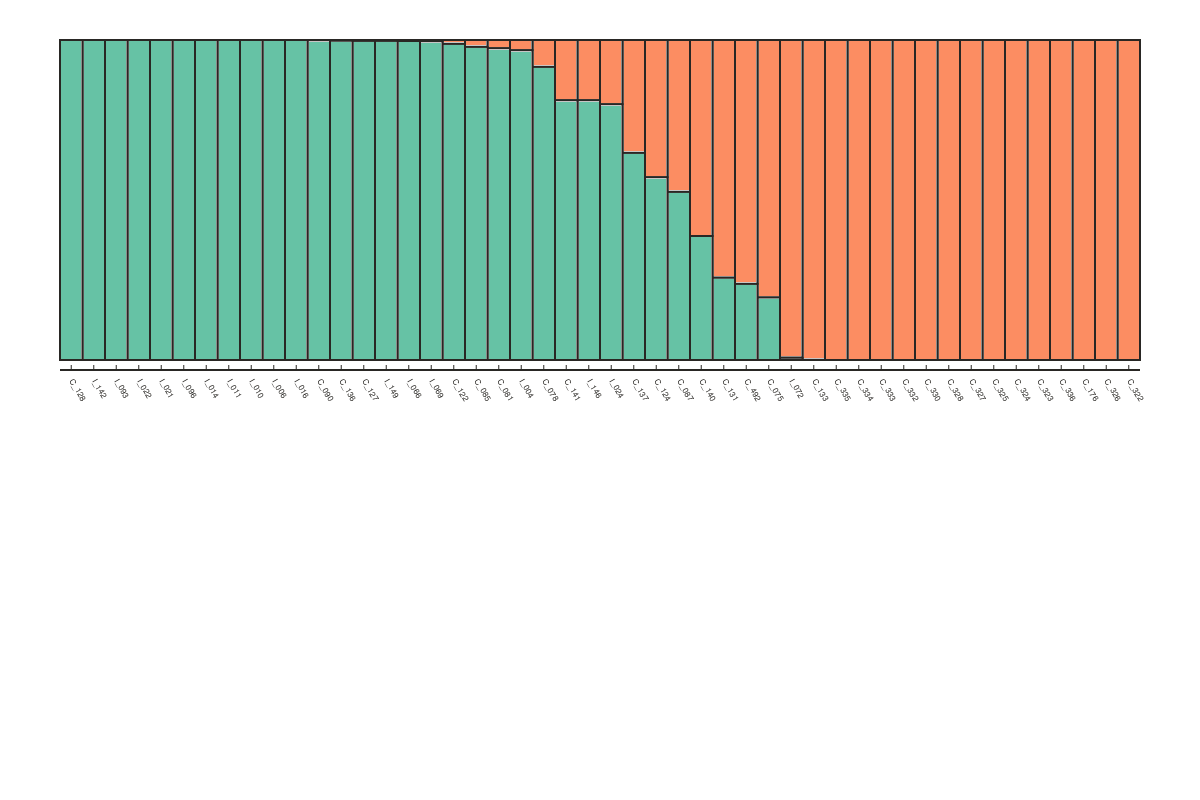

In [133]:
toPLot = table_K2.sort_values(by='pop2')
toPLot
fancy_plot(toPLot, out="TsugaK2")

In [150]:
table_K3
table_K3.index = new_key["col1"]
table_K3.columns = ['pop1', 'pop2', 'pop3']

toPLot = table_K3.sort_values(by='pop1')
#fancy_plot(toPLot, out="TsugaK3")

In [151]:
toPLot  

,pop1,pop2,pop3
col1,,,
C_325,0.0000,0.1966,0.8034
C_336,0.0000,0.2272,0.7728
C_322,0.0000,0.1876,0.8124
C_323,0.0000,0.1302,0.8698
C_324,0.0000,0.2440,0.7560
C_087,0.0000,1.0000,0.0000
C_326,0.0000,0.0594,0.9406
C_176,0.0000,0.5038,0.4962
C_328,0.0000,0.0724,0.9276


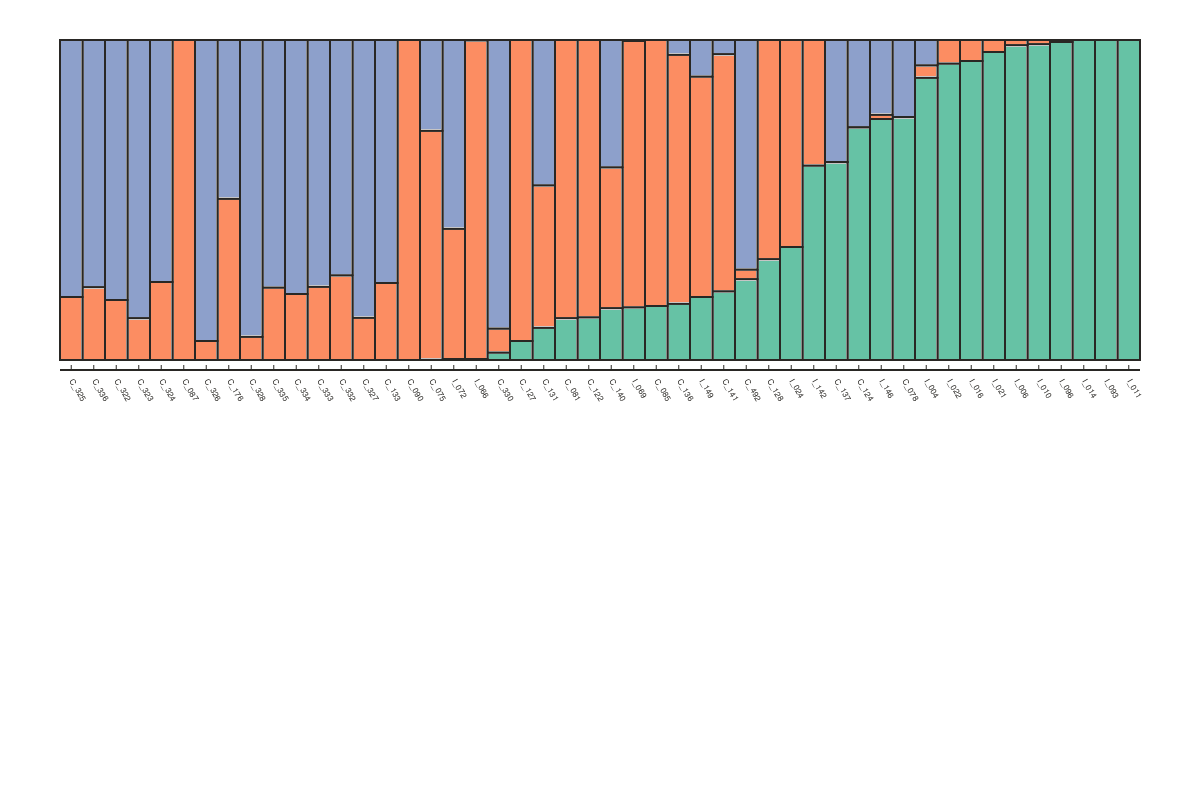

In [152]:
fancy_plot(toPLot, out="TsugaK3")